# Projeto Final - Aprendizado de Máquinas I
# PES 03 - Professor George Darmiton da Cunha Cavalcanti

## Michele Beatriz Lopes Farias
## Rafael Couto de Oliveira
---

# 0.0 Imports

In [31]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# 1.0 Carregando dados

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv


Ela classifica o preço de telefones celulares como: low cost, medium cost, high cost e very high cost de acordo com algumas características de cada aparelho

Dados disponiveis em duas amostras: Treino e teste..

In [3]:
df= pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

# 2.0 Pre processamento dos dados

## 2.1 Tamanho dos dados

In [4]:
print (f'Número de linhas: {df.shape[0]}')
print (f'Número de colunas: {df.shape[1]}')

Número de linhas: 2000
Número de colunas: 21


## 2.2 Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2.3 Verificação de valores nulos

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Ajuste das colunas

### 2.4.1 Renomeando as colunas

Battery_power : capacity in mAh


blue : Has bluetooth or not


clock_speed : speed at which microprocessor executes instructions


dual_sim : Has dual sim support or not


fc : Front Camera mega pixels

four_g : Is 4g or not

int_memory : Internal Memory in Gigabytes

m_dep : mob depth in cms

mobile_wt : weight of phone in gms

n_cores : Number of cores of processor

pc : primary camera megapixels

px_height : pixel resolution height

px_width : pixel resolution width

ram : capacity

sc_h : screen height

sc_w : screen width

talk_time : in hrs

three_g : Is 3g or not

touch_screen : is touch screen or not

wifi : has wifi or not
price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). **

### 2.4.2 Ajustando tipo das colunas

In [36]:
# Converter colunas para booleano
colunas_bool = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[colunas_bool] = df[colunas_bool].astype('boolean')

# Converter coluna 'price_range' para categoria
df['price_range'] = df['price_range'].astype('category')

## 2.6 Feature Engineering

# 3.0 Descrição dos dados

In [37]:
# Ajustar a configuração de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


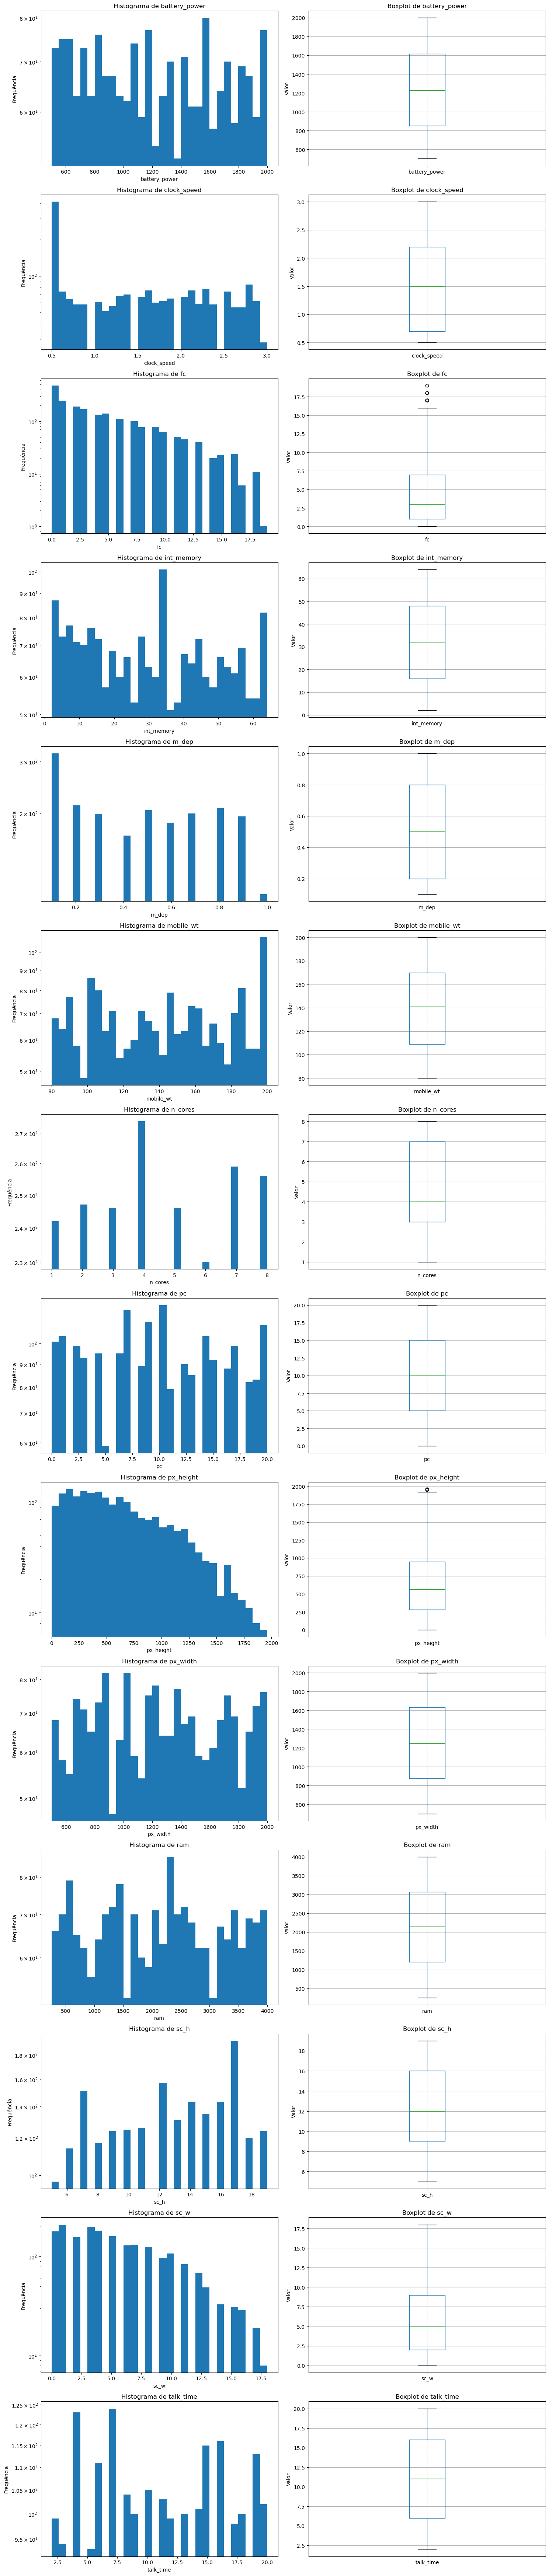

In [38]:
# Selecionando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, ncols=2, figsize=(15, 5*nlinhas))


# Plotar um histograma e boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    #plot do histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}', log=True)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequência')
    
    # Plotar o boxplot
    ax_box = axes[i, 1]
    df.boxplot(column=col, ax=ax_box)
    ax_box.set_title(f'Boxplot de {col}')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Valor')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.2 Dados categóricos

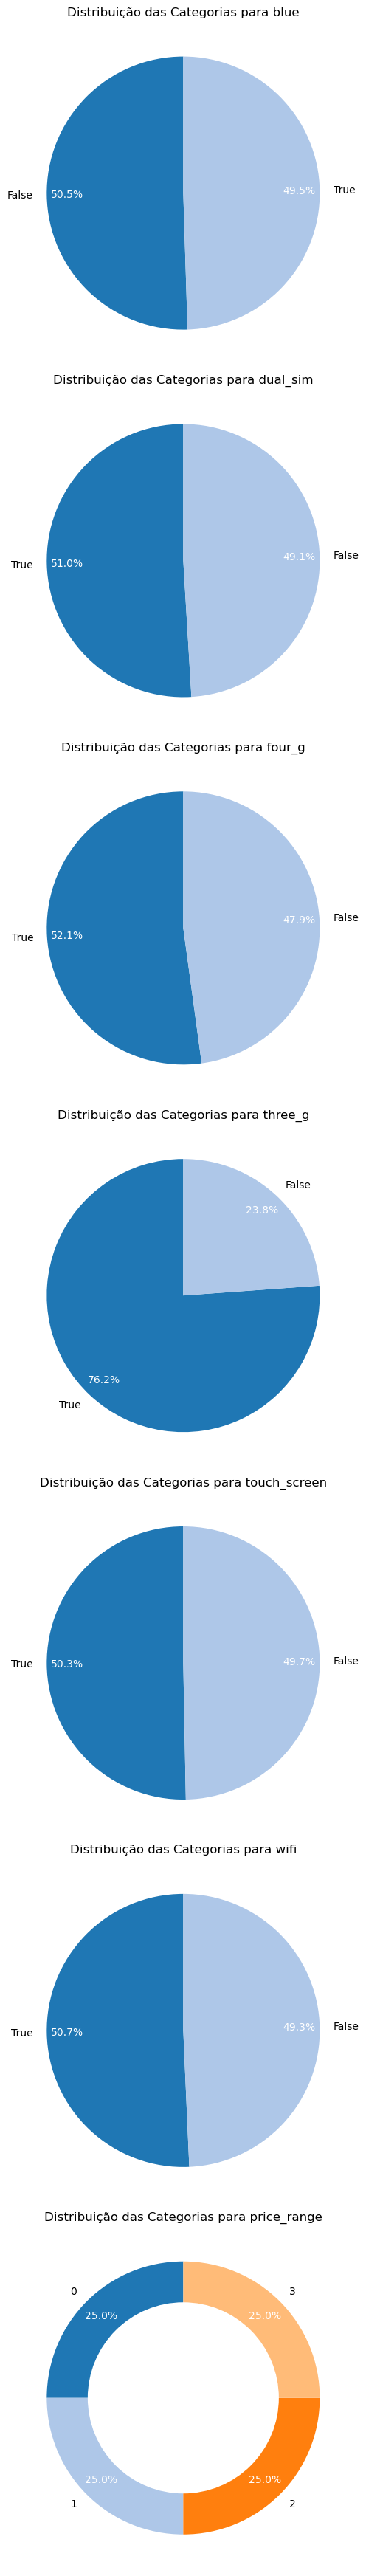

In [60]:
# Selecionando apenas as colunas categóricas
colunas_categoricas = df.select_dtypes(include=['bool', 'category']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_categoricas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, figsize=(15, 5*nlinhas))


# Plotar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    value_counts = df[col].value_counts()
    sizes = value_counts.values
    labels = value_counts.index

    # Gráfico de Pizza
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('tab20').colors  # Usando uma colormap para cores variadas
    )

    # Adicionar valores diretamente nas fatias
    for text in autotexts:
        text.set_color('white')

    # Adicionar um círculo branco no centro para um visual de donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(f'Distribuição das Categorias para {col}')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.3  Correlação entre os dados

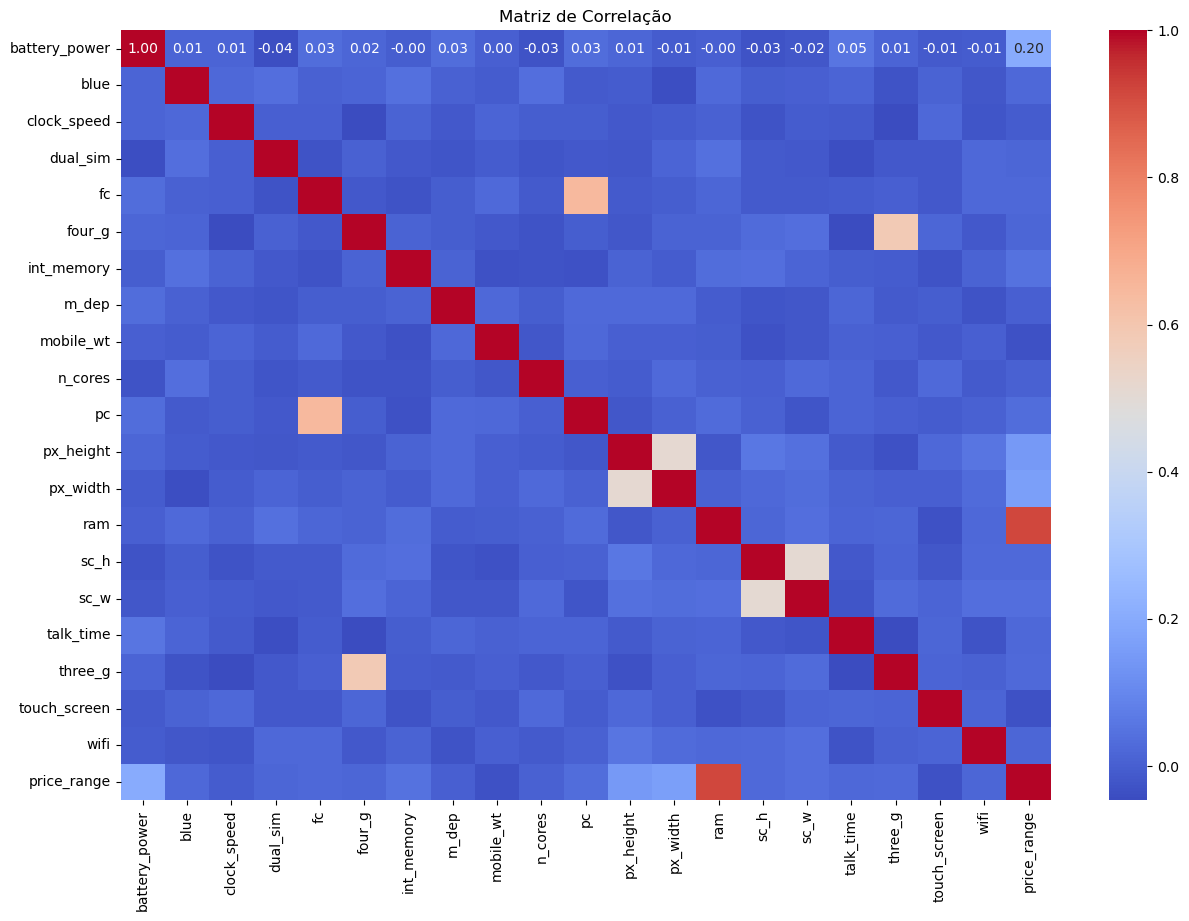

In [61]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## 3.4  Distribuição por target



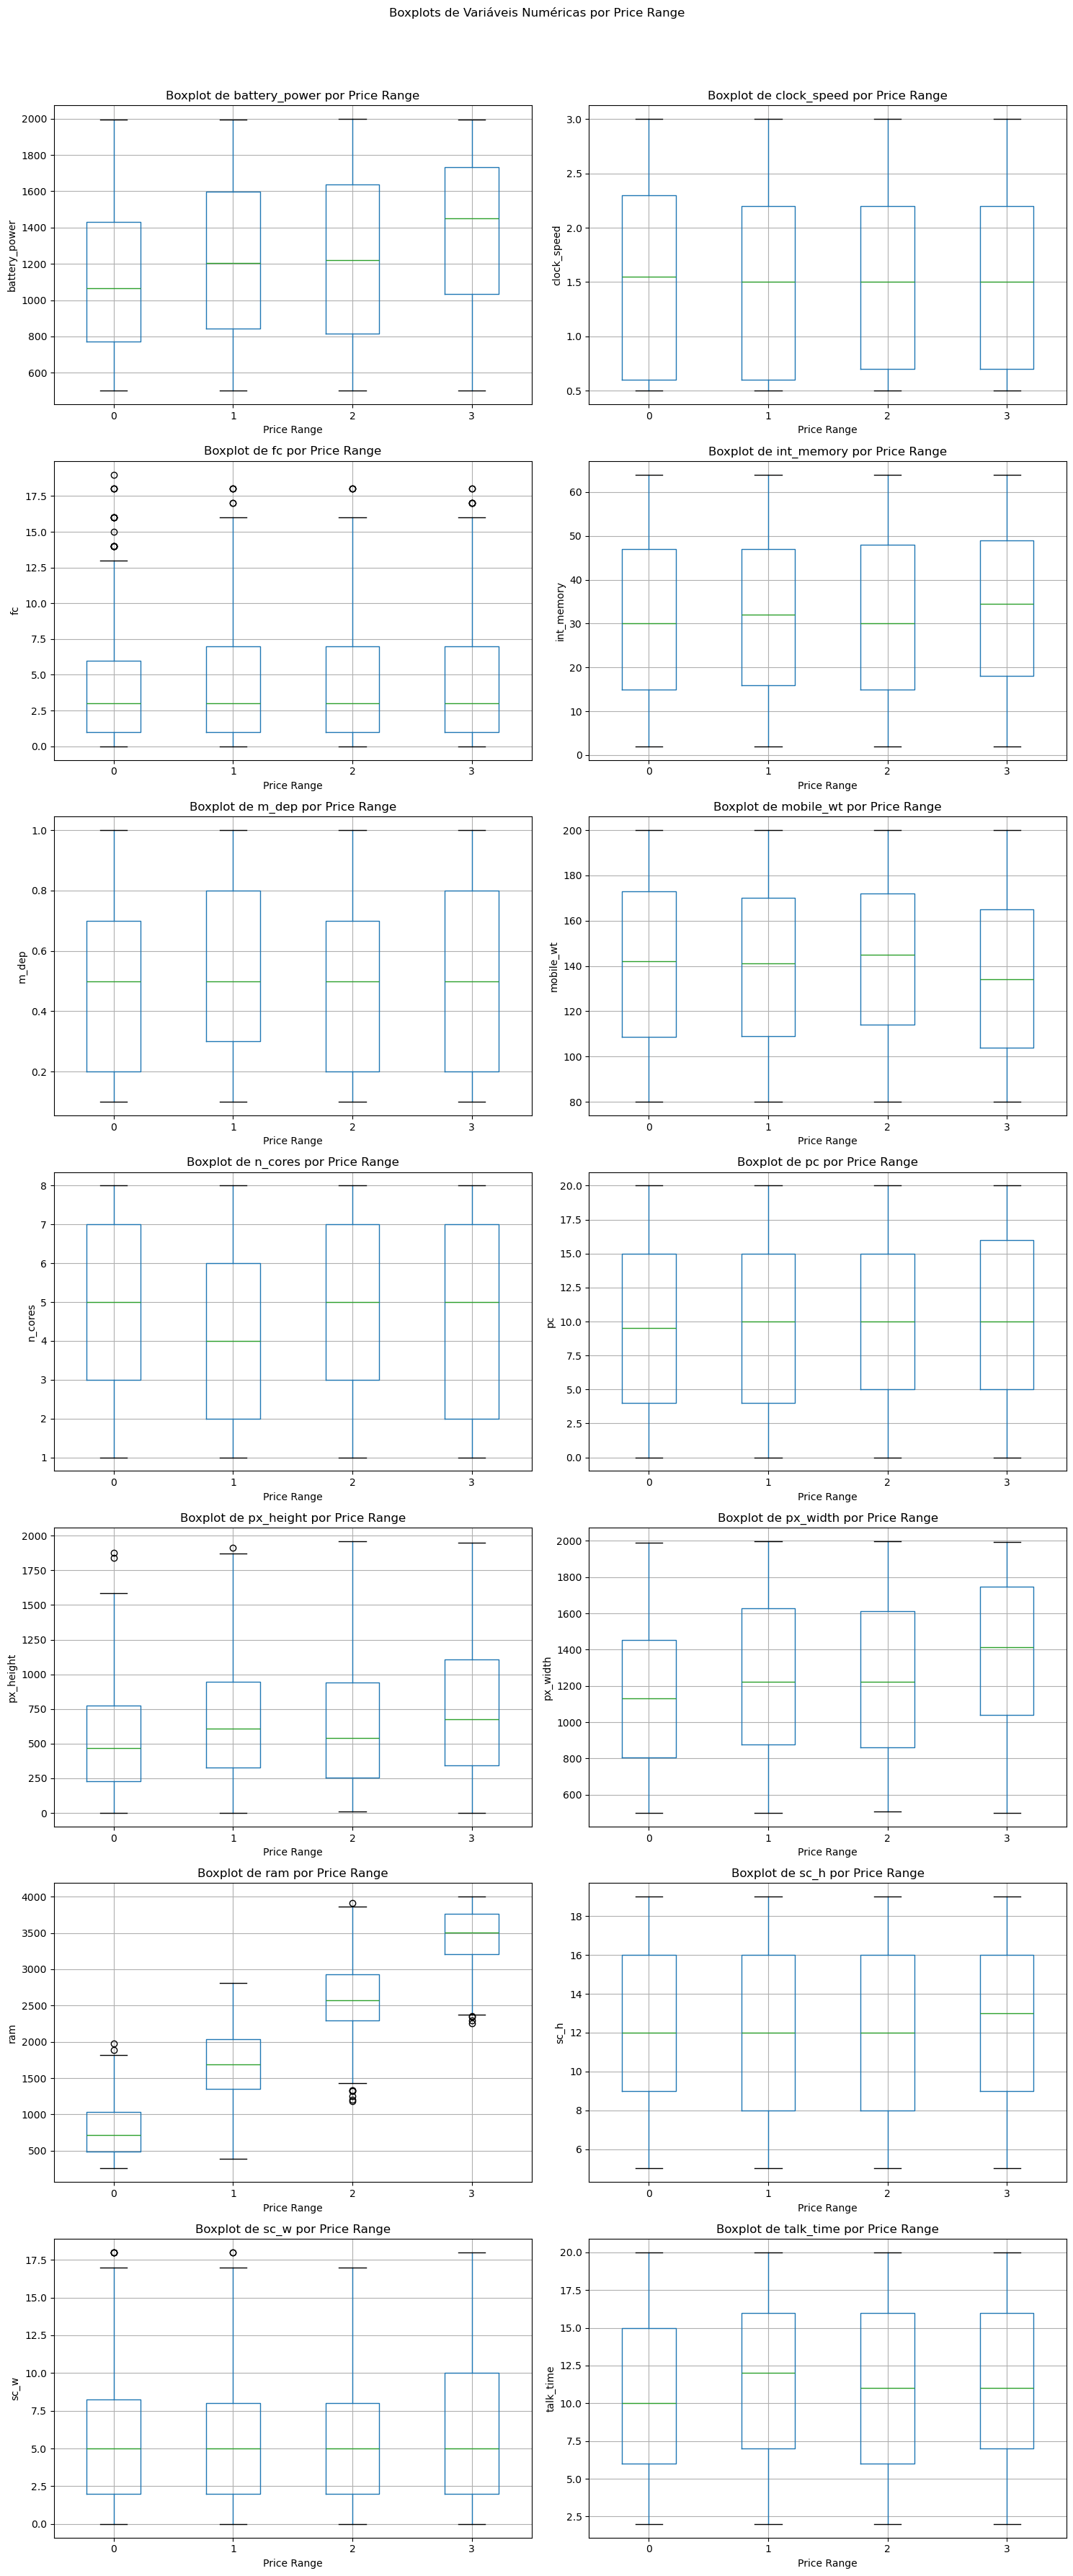

In [63]:
## plotar boxplot dos 4 targets por coluna
# Selecionar apenas as colunas numéricas (excluindo 'price_range')
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calculando o número de linhas para o grid de subplots
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas+1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    df.boxplot(column=col, by='price_range', ax=ax)
    ax.set_title(f'Boxplot de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(col)

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Boxplots de Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

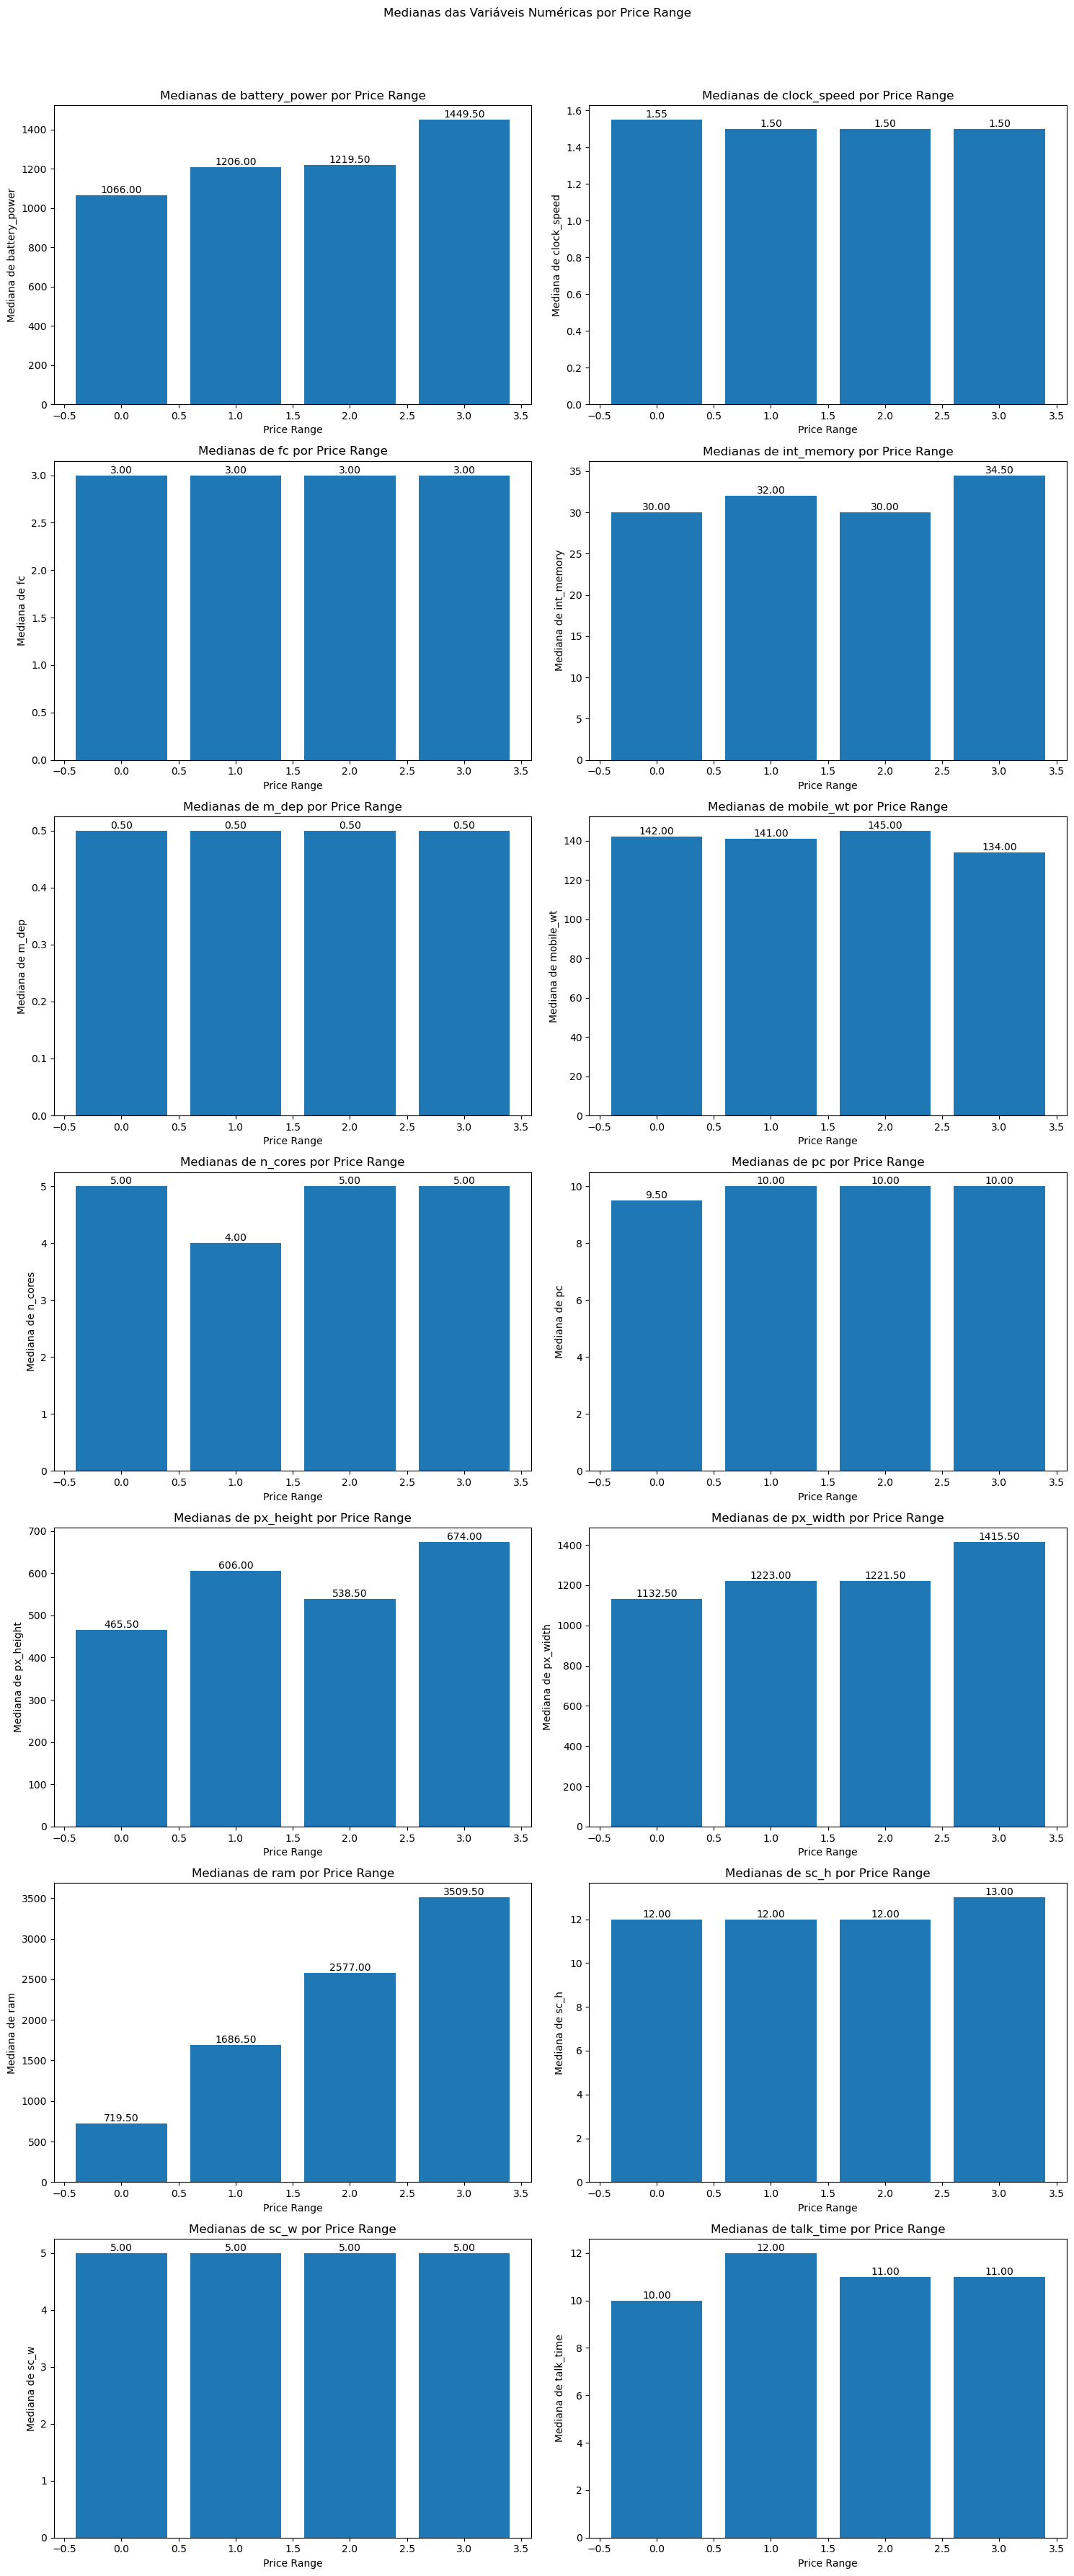

In [69]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas + 1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar gráficos de barras para as medianas de cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    
    # Calcular medianas por price_range
    medians = df.groupby('price_range', observed=False)[col].median().reset_index()
    
    # Plotar gráfico de barras
    ax.bar(medians['price_range'], medians[col])
    ax.set_title(f'Medianas de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(f'Mediana de {col}')
    
    # Adicionar valores nas barras
    for j, value in enumerate(medians[col]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Medianas das Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()